Aşağıdaki kod bloğunda mypgmwrite ve mypgmread fonksiyonları yer almaktadır.

In [1017]:
def mypgmwrite(fileName, k, magicNumber, comment, width, height, intensity):
    maxVal = 2**k - 1
    with open(fileName, "wb") as file:
        file.write(magicNumber.encode() + b"\n")
        if comment:
            file.write(comment.encode() + b"\n")
        file.write(str(width).encode() + b" " + str(height).encode() + b"\n")
        file.write(str(maxVal).encode() + b"\n")
        file.write(intensity)

def mypgmread(fileName):
    with open(fileName, "rb") as file:
        header = file.readline().decode(encoding="ascii").strip()
        comment = file.readline().decode(encoding="ascii").strip()
        if header not in "P5":
            return print("The read file is not a binary encoded (P5 format) PGM file!")

        sizeInfo = file.readline().decode(encoding="ascii").strip()
        width, height = map(int, sizeInfo.split())

        maxVal = file.readline().decode(encoding="ascii").strip()
        kVal = int(mylog2(int(maxVal) + 1)) # Okunan maxVal değerini byte karşılığında ifade etme işlemi
        
        intensity = file.read()

        return kVal, header, comment, width, height, intensity

def mylog2(input):
    # Bu fonksiyon 2 tabanında logaritma alma işlemini gerçekleştirir, math kütüphanesini kullanmaktan kaçınmak maksadıyla oluşturuldu
    if input == 0:
        return 0
    elif input == 1:
        return 0
    elif input == 2:
        return 1
    else:
        return 1 + mylog2(input / 2)

Aşağıdaki kod bloğunda okunan bir dosyanın doğruca yazılması işlemi gerçekleştirilmektedir. Okunan bir dosyanın yazdırılarak hem okuma hem de yazma fonksiyonlarının test edilmesini sağlamak maksadıyla oluşturulmuştur.

In [1018]:
def myReadAndWriteReceived(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)
    mypgmwrite(outputFile, kVal, header, comment, width, height, receivedIntensity)

Aşağıdaki kod bloğu okunan bir görüntünün negatife dönüşümünü sağlamaktadır.

In [1019]:
def myImageNegative(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile) # görüntü okunarak veriler çekilir

    # Negatife çevirme işlemi her pixelin değerinin azami pixel değerinden çıkarılmasıyla gerçekleştirilir:
    maxVal = 2**kVal - 1
    negativeIntensity = b""
    for pixel in receivedIntensity:
        negativePixel = maxVal - pixel
        negativeIntensity += bytes([negativePixel])

    mypgmwrite(outputFile, kVal, header, comment, width, height, negativeIntensity) # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda matplotlib kullanılarak görüntüyü çizdirme işlemi çeşitli layoutlarda gerçekleştirilir.

In [1020]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def myPGMDisplay(pgmFile, title):
  image = mpimg.imread(pgmFile) # pgm dosyasını oku
  plt.imshow(image, cmap='gray') # görüntüyü gray map'leme ile göster
  plt.title(title) # plota title ekle
  plt.show()

""" İkili """

def myPGMDisplayDouble(pgmFile, pgmFileOther, title, titleOther, description):
  # Görüntüyü oku
  image = mpimg.imread(pgmFile)
  imageOther = mpimg.imread(pgmFileOther)

  # İki subplot'lu figure oluştur
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))

  # İlk görüntüyü ilk subplot'ta göster
  axes[0].imshow(image, cmap='gray')
  axes[0].set_title(title)

  # İkinci görüntüyü ikinci subplot'ta göster
  axes[1].imshow(imageOther, cmap='gray')
  axes[1].set_title(titleOther)

  plt.tight_layout() # subplot layout'unu sıklaştır
  fig.text(0.5, -0.05, description, ha='center')

  plt.show() # plot'u göster

""" Üçlü """

def myPGMDisplayTriple(pgmFile1, pgmFile2, pgmFile3, title1, title2, title3, description):
  # Görüntüyü oku
  image1 = mpimg.imread(pgmFile1)
  image2 = mpimg.imread(pgmFile2)
  image3 = mpimg.imread(pgmFile3)

  # Üç subplot'lu figure oluştur
  fig, axes = plt.subplots(1, 3, figsize=(12, 4))

  axes[0].imshow(image1, cmap='gray')
  axes[0].set_title(title1)

  axes[1].imshow(image2, cmap='gray')
  axes[1].set_title(title2)

  axes[2].imshow(image3, cmap='gray')
  axes[2].set_title(title3)
  
  plt.tight_layout() # subplot layout'unu sıklaştır
  fig.text(0.5, 0, description, ha='center')

  plt.show() # plot'u göster

""" Dörtlü """

def myPGMDisplayQuadra(pgmFile1, pgmFile2, pgmFile3, pgmFile4, title1, title2, title3, title4, description):
  # Görüntüyü oku
  image1 = mpimg.imread(pgmFile1)
  image2 = mpimg.imread(pgmFile2)
  image3 = mpimg.imread(pgmFile3)
  image4 = mpimg.imread(pgmFile4)

  # Dört subplot'lu figure oluştur
  fig, axes = plt.subplots(2, 2, figsize=(8, 8))

  # Görüntüleri subplot'ta göster
  axes[0, 0].imshow(image1, cmap='gray')
  axes[0, 0].set_title(title1)

  axes[0, 1].imshow(image2, cmap='gray')
  axes[0, 1].set_title(title2)

  axes[1, 0].imshow(image3, cmap='gray')
  axes[1, 0].set_title(title3)

  axes[1, 1].imshow(image4, cmap='gray')
  axes[1, 1].set_title(title4)

  plt.tight_layout() # subplot layout'unu sıklaştır
  fig.text(0.5, -0.05, description, ha='center')

  plt.show() # plot'u göster

""" Altılı """

def myPGMDisplayHexa(pgmFile1, pgmFile2, pgmFile3, pgmFile4, pgmFile5, pgmFile6, title1, title2, title3, title4, title5, title6, description):
  # Görüntüyü oku
  image1 = mpimg.imread(pgmFile1)
  image2 = mpimg.imread(pgmFile2)
  image3 = mpimg.imread(pgmFile3)
  image4 = mpimg.imread(pgmFile4)
  image5 = mpimg.imread(pgmFile5)
  image6 = mpimg.imread(pgmFile6)

  # Altı subplot'lu figure oluştur
  fig, axes = plt.subplots(3, 2, figsize=(12, 8))

  # Görüntüleri subplot'ta göster
  axes[0, 0].imshow(image1, cmap='gray')
  axes[0, 0].set_title(title1)

  axes[0, 1].imshow(image2, cmap='gray')
  axes[0, 1].set_title(title2)

  axes[1, 0].imshow(image3, cmap='gray')
  axes[1, 0].set_title(title3)

  axes[1, 1].imshow(image4, cmap='gray')
  axes[1, 1].set_title(title4)

  axes[2, 0].imshow(image5, cmap='gray')
  axes[2, 0].set_title(title5)

  axes[2, 1].imshow(image6, cmap='gray')
  axes[2, 1].set_title(title6)

  plt.tight_layout() # subplot layout'unu sıklaştır
  fig.text(0.5, -0.05, description, ha='center')

  plt.show() # plot'u göster

Aşağıdaki kod bloğunda log transformation fonksiyonu tanımlanmıştır.

In [1021]:
def myLogTransform(inputFile, outputFile, c):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile) # görüntü okunarak veriler çekilir

    # Log transformasyonu gerçekleştirilir:
    logTransformedIntensity = b""
    for pixel in receivedIntensity:
        logTransformedPixel = round(myLog(pixel + 1) * c)
        logTransformedIntensity += bytes([logTransformedPixel])

    mypgmwrite(outputFile, kVal, header, comment, width, height, logTransformedIntensity) # işlenen görüntü yazdırılır

def myLog(input):
    # math kütüphanesini import etmemek amacıyla 10 tabanında log alan fonksiyon
    if input <= 0:
        raise ValueError("Input pozitif olmak zorundadır!")
    log = 0
    while input > 1:
        input /= 2
        log += 1

    return log
    

Aşağındaki kod bloğunda gamma correction fonksiyonu yer almaktadır.

In [1022]:
def myGammaCorrection(inputFile, outputFile, c, gamma):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile) # görüntü okunarak veriler çekilir

    # Alınan intensity elemanlarına gamma correction uygulanır:
    correctedIntensity = [c * (x ** gamma) for x in receivedIntensity]

    # 0-255 arasına map'lenir
    minIntensity = min(correctedIntensity)
    maxIntensity = max(correctedIntensity)
    normalizedIntensity = [(255 * (x - minIntensity) / (maxIntensity - minIntensity)) for x in correctedIntensity]

    # Gamma Correction uygulanıp normalize edilen elemanlar Byte'ye convert edilir
    gammaCorrectedIntensityBytes = bytes(int(x) for x in normalizedIntensity)

    mypgmwrite(outputFile, kVal, header, comment, width, height, gammaCorrectedIntensityBytes) # işlenen görüntü yazdırılır

Aşağındaki kod bloğunda görüntü yumuşatma fonksiyonu yer almaktadır.

Derste değinildiği gibi iç içe döngü oluşturarak maske görüntüye uygulandı. Benim için en zorlayıcı kısım bu fonksiyonun beklendiği gibi çalışması oldu.

In [1023]:
def myImageCorrelation(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile) # görüntü okunarak veriler çekilir

    # Correlation gerçekleştirilir:
    correlatedIntensity = []
    for y in range(height):
        for x in range(width):
            correlatedPixel = 0
            for i in range(len(m)):
                for j in range(len(m[0])):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        correlatedPixel += receivedIntensity[(y + i) * width + (x + j)] * m[i][j]

            # Yumuşatılan pixel array'a yazılır:
            correlatedPixel /= (2 * len(m) // 2 + 1) ** 2
            correlatedIntensity.append(round(correlatedPixel))

    # Array byte'ye convert edilir:
    correlatedIntensityBytes = bytes(correlatedIntensity)

    mypgmwrite(outputFile, kVal, header, comment, width, height, correlatedIntensityBytes) # işlenen görüntü yazdırılır


Aşağındaki kod bloğunda averaging mask yöntemiyle impulse noise tipindeki gürültüyü gideren fonksiyon yer almaktadır.

In [1024]:
def myAveragingMask(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)  # görüntü okunarak veriler çekilir

    # Averaging Mask yöntemiyle gürültü giderilmesi işlemi:
    averagingMaskedIntensity = []
    for y in range(height):
        for x in range(width):
            averagingMaskedPixel = 0
            for i in range(len(m) // 2, len(m) // 2 + 1):
                for j in range(len(m[0]) // 2, len(m[0]) // 2 + 1):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        averagingMaskedPixel += receivedIntensity[(y + i) * width + (x + j)] * m[i + len(m) // 2][j + len(m[0]) // 2]

            # Gürültüsü giderilen pixel array'a yazılır, 0-255 arasında değerlendirilir:
            averagingMaskedPixel = max(0, min(255, round(averagingMaskedPixel)))
            averagingMaskedIntensity.append(averagingMaskedPixel)

    # Array byte'ye convert edilir:
    averagingMaskedIntensityBytes = bytes(averagingMaskedIntensity)

    mypgmwrite(outputFile, kVal, header, comment, width, height, averagingMaskedIntensityBytes)  # işlenen görüntü yazdırılır


Aşağındaki kod bloğunda median filter yöntemiyle impulse noise tipindeki gürültüyü gideren fonksiyon yer almaktadır.

In [1025]:
def myMedianFilter(inputFile, outputFile, m):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)  # görüntü okunarak veriler çekilir

    # Median Filter yöntemiyle gürültü giderilmesi işlemi:
    medianFilteredIntensity = []
    for y in range(height):
        for x in range(width):
            medianFilteredPixel = []
            for i in range(-len(m) // 2, len(m) // 2 + 1):
                for j in range(-len(m[0]) // 2, len(m[0]) // 2 + 1):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        medianFilteredPixel.append(receivedIntensity[(y + i) * width + (x + j)] * m[i + len(m) // 2][j + len(m[0]) // 2])

            # Gürültüsü giderilen pixel array'a yazılır:
            medianFilteredPixel.sort()
            medianFilteredIntensity.append(medianFilteredPixel[len(medianFilteredPixel) // 2])

    # Array byte'ye convert edilir:
    medianFilteredIntensityBytes = bytes(medianFilteredIntensity)

    mypgmwrite(outputFile, kVal, header, comment, width, height, medianFilteredIntensityBytes)  # işlenen görüntü yazdırılır


Aşağıdaki kod bloğunda histogram equalizing fonksiyonu yer almaktadır.

In [1026]:
def myHistogramEqualize(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)  # görüntü okunarak veriler çekilir
    
    # Histogram oluşturulur
    histogram = [0 for i in range(256)]
    for pixel in receivedIntensity:
        histogram[pixel] += 1

    # Eşitleme fonksiyonu hesaplanır
    equalizationFunction = [0 for i in range(256)]
    for i in range(256):
        for j in range(i + 1):
            equalizationFunction[i] += histogram[j]
        equalizationFunction[i] = round(equalizationFunction[i] * 255 / (width * height))

    # Görüntü eşitlenir
    equalizedIntensity = []
    for pixel in receivedIntensity:
        equalizedIntensity.append(equalizationFunction[pixel])

    equalizedIntensityBytes = bytes(equalizedIntensity)

    mypgmwrite(outputFile, kVal, header, comment, width, height, equalizedIntensityBytes)  # işlenen görüntü yazdırılır

    return histogram, equalizationFunction # histogram grafiği için histogram, s=T(r) grafiği için equalizationFunction değişkenleri döndürülür

Aşağıdaki kod bloğunda histogram equalization işlemindeki histogram grafiği çizdirilir.

In [1027]:
""" Üçlü plot mantığıyla iki görüntü dosyası bir de histogram grafiği göstermektedir """
def myHistogramGraphDraw(pgmFile1, pgmFile2, histogram, title1, title2, title3, description):
    # Görüntüyü oku
    image1 = mpimg.imread(pgmFile1)
    image2 = mpimg.imread(pgmFile2)

    # Üç subplot'lu figure oluştur
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))

    axes[0].imshow(image1, cmap='gray')
    axes[0].set_title(title1)

    axes[1].imshow(image2, cmap='gray')
    axes[1].set_title(title2)

    axes[2].plot(histogram)
    axes[2].set_title(title3)

    plt.tight_layout() # subplot layout'unu sıklaştır
    fig.text(0.5, 0, description, ha='center')

    plt.show()

Aşağıdaki kod bloğunda histogram equalizing fonksiyonunda oluşan s=T(r) fonksiyonu grafiğini çizdiren fonksiyon yer almaktadır.

In [1028]:
def myDrawSFunctionGraph(s1, s2, s3, s4, title1, title2, title3, title4, description):
    # Dört subplot'lu figure oluştur
    fig, axes = plt.subplots(2, 2, figsize=(6, 6))

    axes[0, 0].plot(range(256), s1)
    axes[0, 0].set_title(title1)

    axes[0, 1].plot(range(256), s2)
    axes[0, 1].set_title(title2)

    axes[1, 0].plot(range(256), s3)
    axes[1, 0].set_title(title3)

    axes[1, 1].plot(range(256), s4)
    axes[1, 1].set_title(title4)

    plt.tight_layout() # subplot layout'unu sıklaştır
    fig.text(0.5, 0, description, ha='center')

    plt.show()

Aşağıdaki kod bloğunda scale etmeyen Laplacian fonksiyonu yer almaktadır.

In [1029]:
def myLaplacianWithoutScaling(inputFile, mask):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)  # görüntü okunarak veriler çekilir
    
    # Laplacian filtresi oluşturulur
    laplacianFilter = mask

    # Görüntü Laplacian filtresi ile işlemden geçirilir
    processedIntensity = []
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            filteredPixel = 0
            for k in range(-1, 2):
                for l in range(-1, 2):
                    filteredPixel += laplacianFilter[k + 1][l + 1] * receivedIntensity[(i + k) * width + (j + l)]
            processedIntensity.append(filteredPixel)
    
    return processedIntensity  # işlenen görüntü döndürülür

Aşağıdaki kod bloğunda scale eden Laplacian fonksiyonu yer almaktadır.

In [1030]:
def myLaplacianWithScaling(inputFile, outputFile, mask):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)  # görüntü okunarak veriler çekilir

    # Alınan veri listelenir
    inputImage = [receivedIntensity[i:i+width] for i in range(0, len(receivedIntensity), width)]

    # Laplacian filtresi uygulanmış sonuçları tutacak liste oluşturulur
    processedIntensity = [[0] * width for _ in range(height)]

    # Laplacian filtresi uygulanır
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            laplacianSum = 0
            for i in range(3):
                for j in range(3):
                    laplacianSum += inputImage[y + i - 1][x + j - 1] * mask[i][j]
            processedIntensity[y][x] = laplacianSum

    # Laplacian filtreli sonuçlar [0, 255] arasına ölçeklenir
    maxVal = max(map(max, processedIntensity))
    minVal = min(map(min, processedIntensity))
    scalingFactor = 255 / (maxVal - minVal)
    scaledIntensity = [[int((x - minVal) * scalingFactor) for x in row] for row in processedIntensity]

    # Ölçeklendirilmiş veri düzleştirilirek byte cinsine çevrilir
    processedIntensity = [val for row in scaledIntensity for val in row]
    processedIntensityBytes = bytes(processedIntensity)
    
    mypgmwrite(outputFile, kVal, header, comment, width, height, processedIntensityBytes)  # işlenen görüntü yazdırılır

Aşağıdaki kod bloğunda Figure 3.38 (d) için Figure 3.37'de yer alan image sharpening işlemi uygulanmaktadır.

In [1031]:
def mySharpenUsingLaplacian(inputFile, outputFile, mask):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)  # görüntü okunarak veriler çekilir

    # Alınan veri listelenir
    inputImage = [receivedIntensity[i:i+width] for i in range(0, len(receivedIntensity), width)]

    # Keskinleştirilmiş verinin tutulacağı liste
    sharpenedIntensity = [[0] * width for _ in range(height)]

    # Laplacian filtresi uygulanır
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            laplacianSum = 0
            for i in range(3):
                for j in range(3):
                    laplacianSum += inputImage[y + i - 1][x + j - 1] * mask[i][j]
            sharpenedIntensity[y][x] = receivedIntensity[y * width + x] - laplacianSum

    # Veriler [0, 255] aralığında ölçeklenir
    for y in range(height):
        for x in range(width):
            sharpenedIntensity[y][x] = max(0, min(255, sharpenedIntensity[y][x]))

    # Keskinleştirilmiş veri PGM'e yazdırılmak için düzleştirilerek ölçeklenir ve byte cinsinden dönüşümü gerçekleştirilir
    sharpenedIntensityScaled = [val for row in sharpenedIntensity for val in row]
    sharpenedIntensityBytes = bytes(sharpenedIntensityScaled)

    mypgmwrite(outputFile, kVal, header, comment, width, height, sharpenedIntensityBytes)  # işlenen görüntü yazdırılır


Aşağıdaki kod bloğunda Gaussian filter ile görüntüyü yumuşatan fonksiyon yer almaktadır. 

In [1032]:
def myGaussianBlur(inputFile, outputFile, maskSize, sigma):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile)

    # receivedIntensity'i 2 boyutlu listeye çevirilir
    inputImage = [receivedIntensity[i:i + width] for i in range(0, len(receivedIntensity), width)]

    # 2 boyutlu gaussian kernel oluşturulur
    kernel = [[0] * maskSize for _ in range(maskSize)]
    kernelCenter = maskSize // 2
    kernelSum = 0

    for i in range(maskSize):
        for j in range(maskSize):
            x = i - kernelCenter
            y = j - kernelCenter
            kernel[i][j] = (1 / (2 * 3.1416 * sigma**2)) * (2.71828**(-1 * (x**2 + y**2) / (2 * sigma**2)))
            kernelSum += kernel[i][j]

    for i in range(maskSize):
        for j in range(maskSize):
            kernel[i][j] /= kernelSum

    # Yumuşatılmış görüntü verisini tutacak liste
    blurredIntensity = [[0] * width for _ in range(height)]

    # Gaussian filtresi uygulanır
    for y in range(height):
        for x in range(width):
            weightedSum = 0
            for i in range(maskSize):
                for j in range(maskSize):
                    neighborX = x + i - kernelCenter
                    neighborY = y + j - kernelCenter
                    if 0 <= neighborX < width and 0 <= neighborY < height:
                        weightedSum += inputImage[neighborY][neighborX] * kernel[i][j]
            blurredIntensity[y][x] = int(weightedSum)

    # Yumuşatılmış görüntü içeriği düzleştirilip byte cinsine çevrilir
    blurredIntensityFlatten = [val for row in blurredIntensity for val in row]
    blurredIntensityBytes = bytes(blurredIntensityFlatten)

    mypgmwrite(outputFile, kVal, header, comment, width, height, blurredIntensityBytes)  # işlenen görüntü yazdırılır

Histogram equalization alındığında orijinalinden daha kötü hale gelen görüntüler şunlardır:
1. Çok düşük kontrasta sahip görüntüler: Histogram equalization uygulandığında görüntünün contrastı, stretching (esnetme) yoluyla değişir.
2. Yüksek gürültülü görüntüler: Histogram equalization bir görüntüdeki gürültünün genliğini yükseltebilir. Bu durumda hali hazırda gürültüden dolayı göze kötü gelen görüntü daha da kötü hale gelecektir.
3. Clipped pixel bulunan göüntüler.
4. High dynamic range (HDR - yüksek dinamik aralık) barındıran görüntüler.

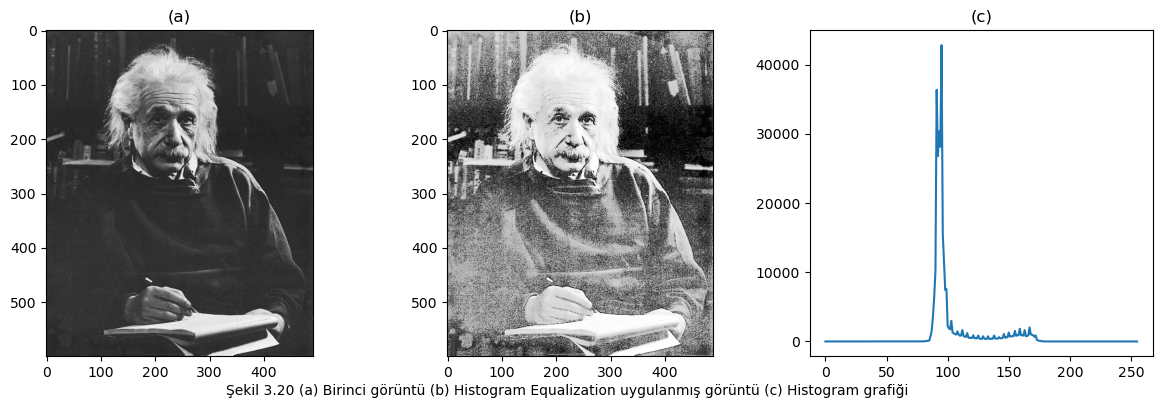

In [1033]:
if __name__ == "__main__":
    # Düşük kontrastlı bir görüntüye histogram equalization işleminin uygulanması:
    inputImage = "Fig0354(a)(einstein_orig).pgm"
    outputImage = 'histogramEq_lowContrast.pgm'
    histogram1, s1 = myHistogramEqualize(inputImage, outputImage)
    
    title = "(a)"
    title2 = "(b)"
    title3 = "(c)"
    description = "Şekil 3.20 (a) Birinci görüntü (b) Histogram Equalization uygulanmış görüntü (c) Histogram grafiği"
    myHistogramGraphDraw(inputImage, outputImage, histogram1, title, title2, title3, description)
    

Aşağıdaki kod bloğunda 2 boyutlu discrete fast Fourier transform fonksiyonu yer almaktadır.

In [1034]:
from math import cos, sin, pi

def my1Dfft(inputSignal):
    N = len(inputSignal)
    if N <= 1:
        return inputSignal

    even = my1Dfft(inputSignal[0::2])
    odd = my1Dfft(inputSignal[1::2])

    T = [complex(cos(2 * pi * k / N), -1 * sin(2 * pi * k / N)) * odd[k] for k in range(N // 2)]

    return [even[k] + T[k] for k in range(N // 2)] + [even[k] - T[k] for k in range(N // 2)]

def my2Dfft(inputFile, outputFile):
    kVal, header, comment, width, height, receivedIntensity = mypgmread(inputFile) # görüntü okunarak veriler çekilir

    # Alınan veri listelenir
    receivedIntensityList = [receivedIntensity[i:i+width] for i in range(0, len(receivedIntensity), width)]
    
    # 2D FFT uygulanan görüntü verisinin tutulacağı liste
    fftAppliedIntensity = [[0] * width for _ in range(height)]

    # 2D FFT uygulanması:
    fftAppliedIntensityRows = [my1Dfft(row) for row in receivedIntensityList]
    fftAppliedIntensityColumns = [my1Dfft([row[i] for row in fftAppliedIntensityRows]) for i in range(width)]

    # Listeyi byte'ye çevirmek maksadıyla magnitude clipping uygulanır:
    for x in range(width):
        for y in range(height):
            magnitude = abs(fftAppliedIntensityColumns[x][y])
            fftAppliedIntensityColumns[x][y] = max(0, min(255, int(magnitude)))

    outputIntensity = myIntensityConverter(fftAppliedIntensityColumns, width, height)

    mypgmwrite(outputFile, kVal, header, comment, width, height, outputIntensity)  # işlenen görüntü yazdırılır

def myIntensityConverter(inputIntensity, width, height):
    # Veriler [0, 255] aralığında ölçeklenir
    for y in range(height):
        for x in range(width):
            inputIntensity[x][y] = max( 0, min( 255, inputIntensity[y][x] ) )

    # Ölçeklenmiş görüntü içeriği düzleştirilip byte cinsine çevrilir
    intensityFlatten = [val for row in inputIntensity for val in row]
    outputIntensity = bytes(intensityFlatten)

    return outputIntensity

Aşağıdaki main kod bloğunda verilen görüntünün Fourier transformu gerçekleştirilmiştir.

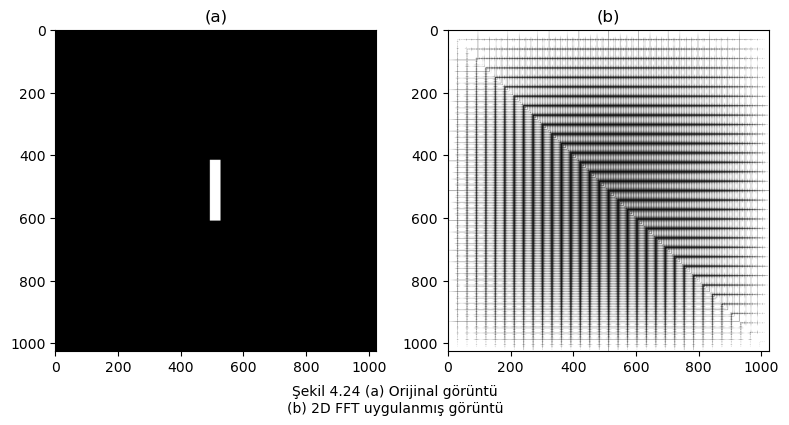

In [1035]:
if __name__ == "__main__":
    originalImage = "Fig0424(a)(rectangle).pgm"
    outputImage = "2dfft_Fig0424.pgm"
    my2Dfft(originalImage, outputImage)
    
    title1 = "(a)"
    title2 = "(b)"
    description = "Şekil 4.24 (a) Orijinal görüntü\n(b) 2D FFT uygulanmış görüntü"
    myPGMDisplayDouble(originalImage, outputImage, title1, title2, description)